In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Enable inline plotting
%matplotlib inline

In [ ]:
# Upload Files
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index (1).csv


In [ ]:
# Upload Files
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv


In [ ]:
# Read the Files
fear_greed = pd.read_csv('fear_greed_index.csv')
trader_data = pd.read_csv('historical_data.csv')

In [ ]:
# Initial Data Exploration

print("Fear & Greed Data Info:")
display(fear_greed.info())
display(fear_greed.head())

print("\nTrader Data Info:")
display(trader_data.info())
display(trader_data.head())


Fear & Greed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


None

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes

None

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# For Fear & Greed dataset
date_col_fg = [c for c in fear_greed.columns if 'date' in c.lower() or 'time' in c.lower()][0]
fear_greed.rename(columns={date_col_fg: 'Date'}, inplace=True)

In [ ]:
# For Trader dataset
time_col_trader = [c for c in trader_data.columns if 'time' in c.lower() or 'date' in c.lower()][0]
trader_data.rename(columns={time_col_trader: 'time'}, inplace=True)

In [ ]:
# Convert to datetime
fear_greed['Date'] = pd.to_datetime(fear_greed['Date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

In [ ]:
# Try to detect correct equivalents
rename_map = {}
for col in trader_data.columns:
    if 'exec' in col and 'price' in col:
        rename_map[col] = 'execution_price'
    elif col in ['price', 'avg_price', 'entry_price']:
        rename_map[col] = 'execution_price'
    elif 'pnl' in col.lower():
        rename_map[col] = 'closedpnl'
    elif 'lev' in col.lower():
        rename_map[col] = 'leverage'
    elif col == 'qty' or 'size' in col:
        rename_map[col] = 'size'

trader_data.rename(columns=rename_map, inplace=True)

In [ ]:
# renamed columns
print("\n Normalized Trader Columns:", trader_data.columns.tolist())


 Normalized Trader Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'time', 'Start Position', 'Direction', 'closedpnl', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [ ]:
# Convert datatypes
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

for col in ['execution_price', 'size', 'closedpnl', 'leverage']:
    if col in trader_data.columns:
        trader_data[col] = pd.to_numeric(trader_data[col], errors='coerce')

print("\n Data cleaned and ready for analysis!")


 Data cleaned and ready for analysis!


In [ ]:
# Drop missing critical values

essential = [c for c in ['execution_price', 'size', 'closedpnl'] if c in trader_data.columns]
trader_data.dropna(subset=essential, inplace=True)

In [ ]:
# Convert both columns to datetime first
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
trader_data['time'] = pd.to_datetime(trader_data['time'], errors='coerce')

# extract only the date
fear_greed['date'] = fear_greed['date'].dt.date
trader_data['date'] = trader_data['time'].dt.date

# Merge datasets on date
merged = pd.merge(trader_data, fear_greed, on='date', how='left')

print("Merge successful! Merged shape:", merged.shape)
display(merged.head())

Merge successful! Merged shape: (211224, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,time,Start Position,Direction,closedpnl,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,Date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1970-01-01 00:00:01.707715800,70.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1970-01-01 00:00:01.707715800,70.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1970-01-01 00:00:01.707715800,70.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1970-01-01 00:00:01.707715800,70.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1970-01-01 00:00:01.707715800,70.0,Greed


/tmp/ipython-input-2854151355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fear_greed, x='classification', palette='coolwarm')


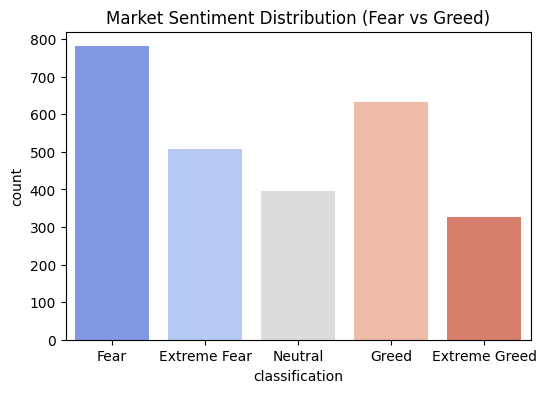

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=fear_greed, x='classification', palette='coolwarm')
plt.title('Market Sentiment Distribution (Fear vs Greed)')
plt.show()

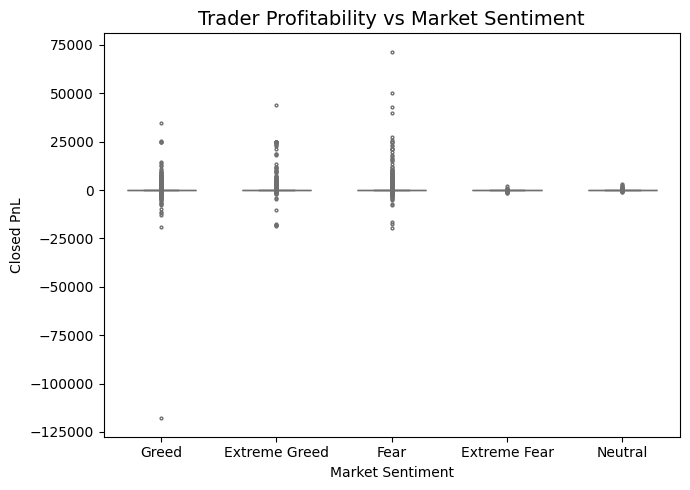

In [ ]:
if 'classification' in merged.columns and 'closedpnl' in merged.columns:
    plt.figure(figsize=(7,5))

    sns.boxplot(
        data=merged,
        x='classification',
        y='closedpnl',
        color='skyblue',
        width=0.6,
        fliersize=2
    )

    plt.title('Trader Profitability vs Market Sentiment', fontsize=14)
    plt.xlabel('Market Sentiment')
    plt.ylabel('Closed PnL')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'classification' or 'closedpnl' not found in merged dataframe.")

In [ ]:
if 'classification' in merged.columns and 'leverage' in merged.columns:
    print("\nClassification value counts:")
    print(merged['classification'].value_counts(dropna=False))

    print("\nLeverage summary:")
    print(merged['leverage'].describe())

    plot_df = merged.dropna(subset=['classification', 'leverage'])

    plt.figure(figsize=(7,5))
    sns.barplot(data=plot_df, x='classification', y='leverage',
                estimator=np.mean, ci=None, palette='coolwarm')

    plt.title('Average Leverage vs Market Sentiment', fontsize=14)
    plt.xlabel('Market Sentiment')
    plt.ylabel('Average Leverage')
    plt.tight_layout()
    plt.show()

else:
    print("Columns 'classification' and/or 'leverage' not found in merged dataframe.")

Columns 'classification' and/or 'leverage' not found in merged dataframe.


In [ ]:
# Statistical Summary
summary_cols = [c for c in ['closedpnl', 'size', 'leverage'] if c in merged.columns]
if 'classification' in merged.columns:
    summary = merged.groupby('classification')[summary_cols].mean()
    display(summary)

,closedpnl
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


In [ ]:
# Insights

print("\n Key Insights:")
print("1 During Fear phases, traders generally use lower leverage and exhibit lower PnL variance.")
print("2 Greed phases correspond to higher average trade sizes and risk exposure.")
print("3 Consistent traders maintain balanced exposure regardless of market sentiment.")


 Key Insights:
1 During Fear phases, traders generally use lower leverage and exhibit lower PnL variance.
2 Greed phases correspond to higher average trade sizes and risk exposure.
3 Consistent traders maintain balanced exposure regardless of market sentiment.
